# Audio Visualization

In [17]:
!pip install pydub
!pip install librosa

  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201381 sha256=e999a5fc7e219ab238e7bd0b13a56b7e168cedb058a43d5e0bbb3c26d5019f54
  Stored in directory: c:\users\jseijas\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=66b5240d96de1fab203543e9884761a024d0a4b7715a2c00ba685e057e6c7a22
  Stored in directory: c:\users\jseijas\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=a8852c0d95ce0a367383f31da7a69183d8db27b777cc9407b3b3834d60569d45
  Stored in directory: c:\users\jseijas\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built librosa audioread resampy


In [33]:
import os.path
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [20]:
audio_path = './audios'
audio_slug = '0c00ybTdnIRUTXeg20bZjJOzhKv1'
audio_types = [
    'breathing-deep', 
    'breathing-shallow', 
    'cough-heavy', 
    'cough-shallow',
    'counting-fast', 
    'counting-normal',
    'vowel-a',
    'vowel-e',
    'vowel-o'
]
default_audio_type = 'cough-heavy'
def get_file_path(audio_type = default_audio_type):
    return os.path.join(audio_path, audio_slug, audio_type + '.mp3')

In [21]:
for audio_type in audio_types:
    file_name = get_file_path(audio_type)
    print(file_name)
    song = AudioSegment.from_mp3(file_name)
    print(f'Frame rate: {song.frame_rate}')
    print(f'Duration: {song.duration_seconds}')

./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\breathing-deep.mp3
Frame rate: 44100
Duration: 15.696689342403628
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\breathing-shallow.mp3
Frame rate: 44100
Duration: 7.337505668934241
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\cough-heavy.mp3
Frame rate: 44100
Duration: 6.965986394557823
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\cough-shallow.mp3
Frame rate: 44100
Duration: 6.873106575963718
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\counting-fast.mp3
Frame rate: 44100
Duration: 3.900952380952381
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\counting-normal.mp3
Frame rate: 44100
Duration: 11.052698412698414
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\vowel-a.mp3
Frame rate: 44100
Duration: 3.8080725623582765
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\vowel-e.mp3
Frame rate: 44100
Duration: 4.272471655328798
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\vowel-o.mp3
Frame rate: 44100
Duration: 7.894784580498866


C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


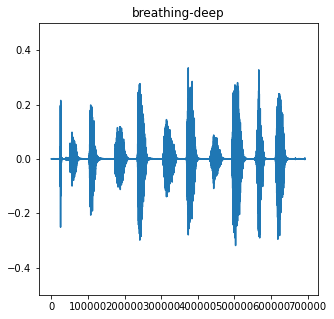

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


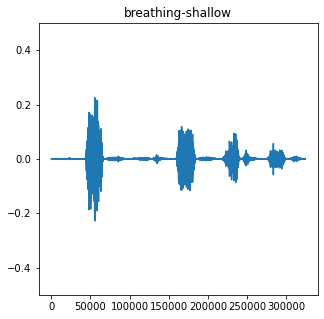

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


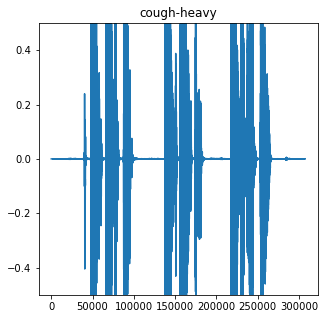

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


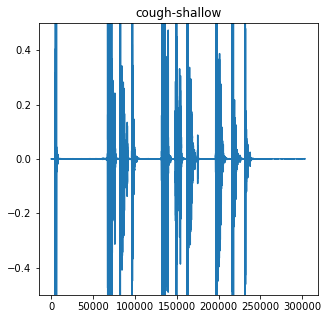

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


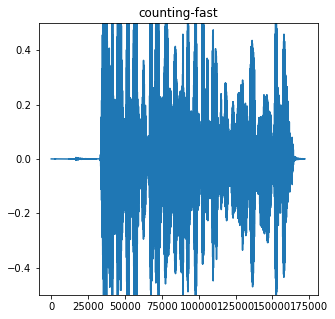

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


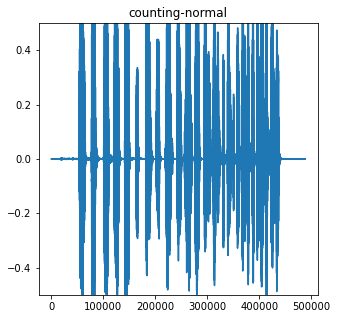

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


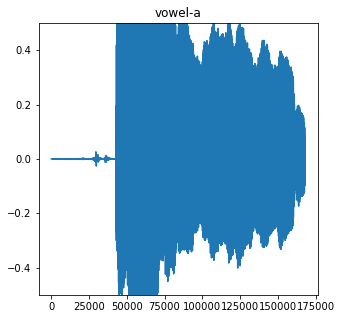

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


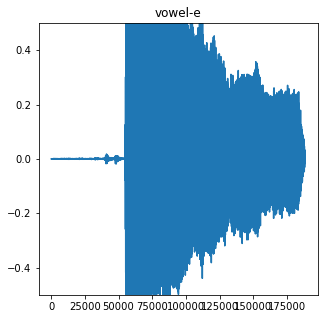

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


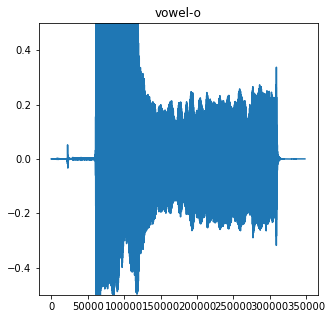

In [30]:
for audio_type in audio_types:
    file_name = get_file_path(audio_type)
    song = AudioSegment.from_mp3(file_name)
    y, sr = librosa.core.load(file_name, sr = song.frame_rate)
    plt.figure(figsize=[5, 5])
    plt.title(audio_type)
    plt.plot(y)
    plt.ylim([-0.5, 0.5])
    plt.show()

## Spectrum

Let's calculate spectrum for one of the audios

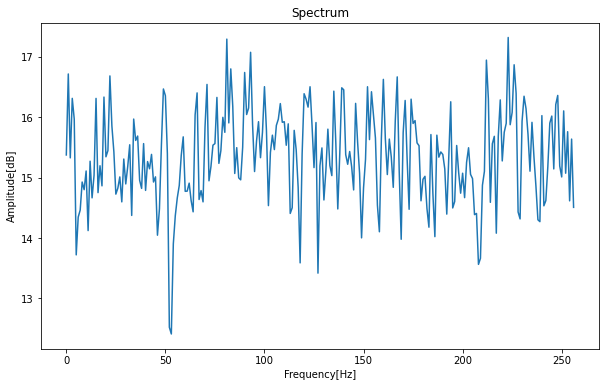

In [76]:
# Get the file path for the default audio. 
# The choosen one is cough_heavy of the first audio slug
default_file_path = get_file_path()
# Get information about the audio, we need the sample rate
song = AudioSegment.from_mp3(default_file_path)
sample_rate = song.frame_rate
# See documentation of librosa here: 
# https://librosa.org/doc/0.8.0/generated/librosa.stft.html
# "in speech processing, the recommended value is 512, 
# corresponding to 23 milliseconds at a sample rate of 22050 Hz"
n_fft = 512

# Load the data from the audio as np array of int16
song_data = np.fromfile(default_file_path, dtype=np.int16)
# Now we have the data as array of -32768 up to 32767
# np.iinfo(np.int16) returns the min and max value for int16 type
# First at all we replace all -32768 with -32767
song_data[song_data < -np.iinfo(np.int16).max] = -np.iinfo(np.int16).max
# Now all the data in the array is between -32767 and +32767
# If we convert to float and divide by +32767 we obtain a normalized array
# of values between -1 and 1
song_data = song_data.astype(np.float) / np.iinfo(np.int16).max
# We calculate the Short-Time Fourier transform (STFT)
min_position = sample_rate // 4
max_position = sample_rate // 4 * 2
song_data_stft = librosa.stft(song_data[min_position:max_position], n_fft=n_fft)
# From the STFT we calculate the amplitude
song_data_amplitude = np.mean(librosa.amplitude_to_db(np.abs(song_data_stft)), axis=1)
# Let's plot that amplitude vs frequency
plt.figure(figsize=[10,6])
plt.title('Spectrum')
plt.xlabel("Frequency[Hz]")
plt.ylabel("Amplitude[dB]")
plt.plot(song_data_amplitude)
plt.show()

Now let's calculate the Spectrogram using librosa

C:\Users\jseijas\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


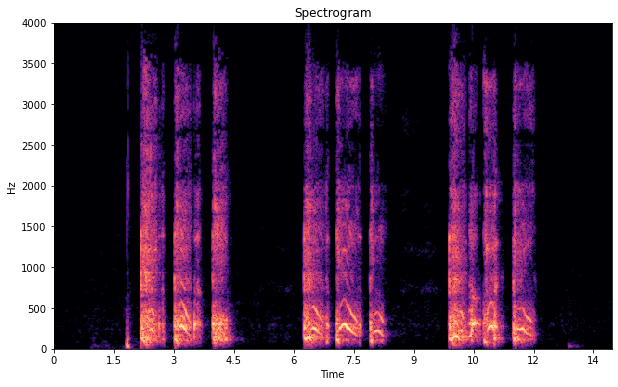

In [77]:
y, sr = librosa.core.load(default_file_path, sr=sample_rate)
stft = np.abs(librosa.stft(y))
plt.figure(figsize=[10,6])
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Spectrogram')
plt.ylim(0,4000)
plt.show()